In [70]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import numpy as np
import pkg_resources
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
def add_intersectional_subgroup_columns(df, subgroups_a, subgroups_b):
  """Adds a boolean column for each pair of subgroups to the data frame.

    New column contains True if the text contains both subgroup terms.
    """
  intersectional_terms = []
  for term_a in subgroups_a:
    for term_b in subgroups_b:
      i_term = "%s %s" % (term_a, term_b)
      intersectional_terms.append(i_term)
      df[i_term] = df[term_a] & df[term_b]
  return intersectional_terms


In [72]:
models = ['TOXICITY@1', 'TOXICITY@6']
madlibs = pd.read_csv('model_card/intersectional_madlibs_scored.csv')

madlibs['label_bool'] = madlibs.apply(lambda row: row.toxicity == 'toxic', axis=1)

# Add columns for each subgroup.
madlibs_words = pd.read_csv('new_madlibber/input_data/English/words.csv')
terms = madlibs_words[madlibs_words.type=='identity'].word.tolist()
model_bias_analysis.add_subgroup_columns_from_text(madlibs, 'phrase', terms)

In [73]:
unitary_gender_orientation_terms = [
    'lesbian',
    'gay',
    'queer',
    'straight',
    'bisexual',
    'homosexual',
    'heterosexual',
    'cis',
    'trans',
    'nonbinary']
unitary_race_terms = [
    'black',
    'white']
unitary_terms = unitary_gender_orientation_terms + unitary_race_terms
intersectional_terms = add_intersectional_subgroup_columns(madlibs, unitary_race_terms, unitary_gender_orientation_terms)

In [74]:
unitary_madlibs_results = model_bias_analysis.compute_bias_metrics_for_models(madlibs, unitary_terms, models, 'label_bool')

In [75]:
intersectional_madlibs_results = model_bias_analysis.compute_bias_metrics_for_models(madlibs, intersectional_terms, models, 'label_bool')

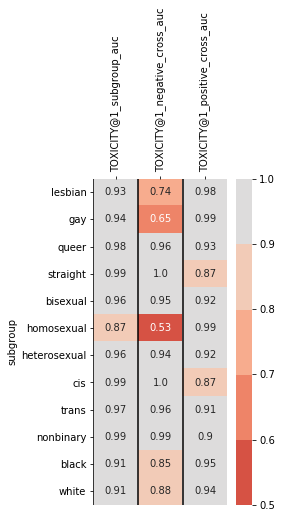

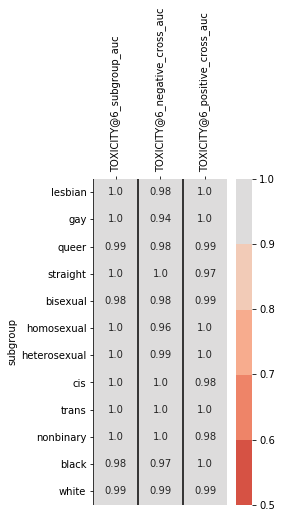

In [76]:
model_bias_analysis.plot_auc_heatmap(unitary_madlibs_results, ['TOXICITY@1'])
model_bias_analysis.plot_auc_heatmap(unitary_madlibs_results, ['TOXICITY@6'])

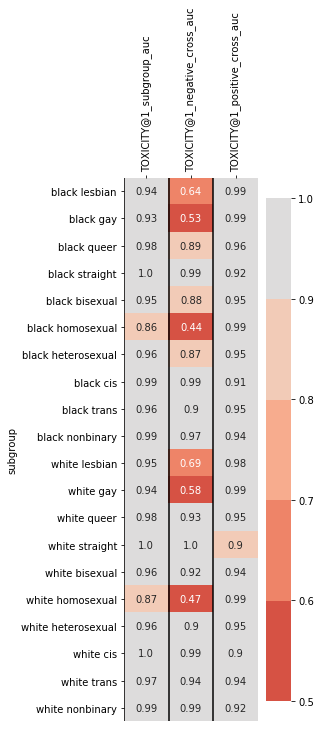

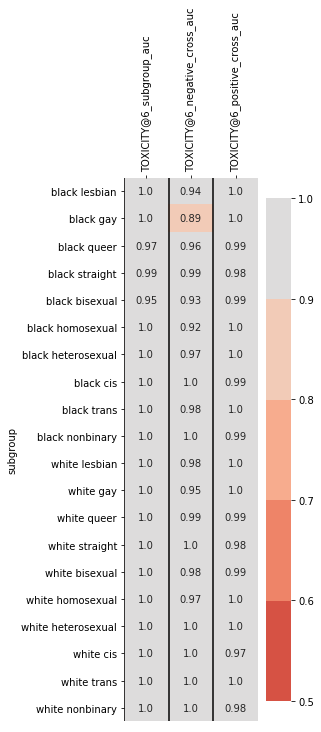

In [77]:
model_bias_analysis.plot_auc_heatmap(intersectional_madlibs_results, ['TOXICITY@1'])
model_bias_analysis.plot_auc_heatmap(intersectional_madlibs_results, ['TOXICITY@6'])

In [78]:
unitary_madlibs_results.to_csv('model_card/unitary_results.csv')

In [79]:
intersectional_madlibs_results.to_csv('model_card/intersectional_results.csv')